# 1. Introduction

In this notebook we are going to deal with a supervised learning (learning with teacher/labels) problem called Support Vector Machine(SVM). Supervised learning is further divided into :
    1. Classification
    2. Regression
The agenda of this notebook is related to SVM under the class of classification (though it is also used under regression also). So only classification and SVM is targeted in this notebook

## 1.1. Classification

The similarity between classification and regression (which make them children of same parent class i.e. supervised learning) that both take a set of training instances and learn a mapping to a target value.But classification is different from regression because under the classification the target value is a discrete class value. 

### 1.1.1 Support Vector Machine

Support Vector Machine under classification is subjected to draw each data instance as a point in m-dimensional space (m:the number of required features) having the value of each feature mapped to a specific coordinate. After that the classification can be performed by finding a hyper-plane that can distinguish two classes. It can be of two type mainly.
    1. Linear SVM - In which hyperplane is a linear function of the variables
    2. Kernel SVM - It is used for non-linearly distinguisable problem.

# 2. Steps Involved:
    0. Importing the required libraries - For importing all the dependencies.
    1. Making the Fucntions of the required steps.
    2. Importing dataset - For importing Dataset in the programm.
    3. Feature Engineering - For getting features from the dataset.
    4. Exploratory Data Analysis (EDA) - for checking the nature and structure of the dataset 
    5. Model Building - For Building the model (using sklearn).
    6. Model Fitting - Fitting the model for clustering.
    7. Saving the model - For re-use.
    8. Loading the model - for loading the trained model
    9. Evaluation of the model - For cheking the utility of the model.   


# 3. Prerequisties

## 3.1 Dataset

Mall_Customers.csv has been used as dataset which is consist of 5 columns:
    1. CustomerID
    2. Genre 
    3. Age
    4. Annual Income
    5. Spending Score

## 3.2 Libraries Requirements
    scikit-learn == 0.19.1
    scipy == 1.1.0
    pandas == 0.23.1
    matplotlib == 2.0.2
    numpy == 1.16.3
    pickle == 0.7.4

# 4. Use Case
Some famous use cases of Support Vector Machine are :
    1. Text and hypertext categorization
    2. Classifications of Images
    3. Bioinformatics
    4. Handwriting recognition
    5. Generalized predictive control (GPC)


## Step 0. Importing the required libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from matplotlib.colors import ListedColormap
import pickle

/home/suryakant/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Step 1. Making the Fucntions of the required steps

In [3]:
# FUNCTION FOR IMPORTING THE DATASET
# Input:path of the dataset (CSV)
# Output:dataframe 
                                   
def import_dataset(path):
  rd=pd.read_csv(path)
  return rd

In [4]:
# FUNCTION FOR SPLITING THE DATASET INTO TRAIN DATASET
# Input:dataframe
# Output:target and features dataset

def split_dataset(df):
    X = df.iloc[:, [2,3]].values
    y = df.iloc[:, 4].values
    return X,y

In [5]:
# FUNCTION FOR SPILTING THE DATA INTO TRAIN AND TEST DATASET
# Input:features dataset, target dataset
# Output:train dataset,test dataset
def split_train_test(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
    return X_train, X_test, y_train, y_test 

In [6]:
# FUNCTION FOR SCALING THE DATA
# Input:training features dataset and testing features dataset
# Output:Scaled datasets
def scaler(X_train,X_test):
    sc_X = StandardScaler()
    X_train_scaled = sc_X.fit_transform(X_train)
    X_test_scaled = sc_X.transform(X_test)
    pickle.dump(sc_X, open('scaling_models/scaler_SVM.pickle', 'wb'))
    return X_train_scaled,X_test_scaled

In [7]:
#FUNCTION FOR BUILDING THE MODEL
#Input:none
#Output:classifier
def model_build():
    classifier = SVC(kernel="linear", random_state=0)
    return classifier

In [8]:
#FUNCTION FOR TRAINING THE MODEL
#Input:classifier, features and target dataset (training)
#Output:trained model
def model_train(classfier,X_train,y_train):
    model = classifier.fit(X_train,y_train)
    return model    

In [9]:
#FUNCTION FOR SAVING MODEL
#Input:trained model
#Output:none
def model_save(model):
    pickle.dump(model, open('models/SVM.pickle', 'wb'))

In [10]:
#FUNCTION FOR LOADING MODEL
#Input:Path of saved model
#Output:Loaded model
def model_load(path_model):
    model_loaded=pickle.load(open(path_model, 'rb'))
    return model_loaded

In [11]:
#FUNCTION FOR PREDICTIONS
#Input:model,dataset for predictions
#Output:predictions
def prediction(model_loaded,X_test):
    y_pred=classifier.predict(X_test)
    return y_pred

In [12]:
#FUNCTION FOR VALIDATIONS
#Input:predictions and real dataset
#Output:consfusion matrix, accuracy and classification report
def validation(y_test,y_pred):
    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    return cm,accuracy,report

## Step 2. Importing dataset

In [13]:
path_dataset = "data/social_network_ads.csv"
df = import_dataset(path_dataset) 
print (df)

      User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
5    15728773    Male   27            58000          0
6    15598044  Female   27            84000          0
7    15694829  Female   32           150000          1
8    15600575    Male   25            33000          0
9    15727311  Female   35            65000          0
10   15570769  Female   26            80000          0
11   15606274  Female   26            52000          0
12   15746139    Male   20            86000          0
13   15704987    Male   32            18000          0
14   15628972    Male   18            82000          0
15   15697686    Male   29            80000          0
16   15733883    Male   47            25000          1
17   15617

## Step 3. Exploratory Data Analysis (EDA)

In [14]:
# Checking the nature of the entiries of Dataset
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [15]:
# Checking the shape of the Dataset
df.shape

(400, 5)

In [16]:
# Checking the structure of the Dataset and Data type of all the variables of Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.7+ KB


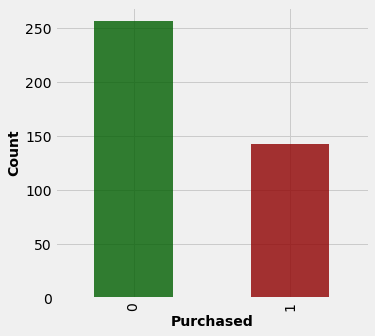

In [17]:
# Cheking the number of the entries under the classes of the Dataset
from matplotlib import pyplot as plt

plt.style.use('fivethirtyeight')
# Customizing plot size
plt.rcParams['figure.figsize'] = [5, 5]

font_style = {'size':14, 'weight':'bold', 'color':'#000000'}

df['Purchased'].value_counts().plot(kind='bar', color=['#005f00', '#8f0000'], 
                                      alpha=0.8)


plt.xlabel('Purchased', fontdict=font_style)
plt.ylabel('Count', fontdict=font_style)
plt.show()

## Step 4.  Feature Engineering 

In [18]:
# Spliting the Dataset (Feature Extraction - Extracting the Features variables as X and target vairables as y)
X,y = split_dataset(df)
print (X,y)

[[    19  19000]
 [    35  20000]
 [    26  43000]
 [    27  57000]
 [    19  76000]
 [    27  58000]
 [    27  84000]
 [    32 150000]
 [    25  33000]
 [    35  65000]
 [    26  80000]
 [    26  52000]
 [    20  86000]
 [    32  18000]
 [    18  82000]
 [    29  80000]
 [    47  25000]
 [    45  26000]
 [    46  28000]
 [    48  29000]
 [    45  22000]
 [    47  49000]
 [    48  41000]
 [    45  22000]
 [    46  23000]
 [    47  20000]
 [    49  28000]
 [    47  30000]
 [    29  43000]
 [    31  18000]
 [    31  74000]
 [    27 137000]
 [    21  16000]
 [    28  44000]
 [    27  90000]
 [    35  27000]
 [    33  28000]
 [    30  49000]
 [    26  72000]
 [    27  31000]
 [    27  17000]
 [    33  51000]
 [    35 108000]
 [    30  15000]
 [    28  84000]
 [    23  20000]
 [    25  79000]
 [    27  54000]
 [    30 135000]
 [    31  89000]
 [    24  32000]
 [    18  44000]
 [    29  83000]
 [    35  23000]
 [    27  58000]
 [    24  55000]
 [    23  48000]
 [    28  79000]
 [    22  1800

## Step 5. Pre-processing

In [19]:
# Dividing the feature variables and target variables into testing and training.
X_train, X_test, y_train, y_test  = split_train_test(X,y)
print (X_train, X_test, y_train, y_test)

[[    44  39000]
 [    32 120000]
 [    38  50000]
 [    32 135000]
 [    52  21000]
 [    53 104000]
 [    39  42000]
 [    38  61000]
 [    36  50000]
 [    36  63000]
 [    35  25000]
 [    35  50000]
 [    42  73000]
 [    47  49000]
 [    59  29000]
 [    49  65000]
 [    45 131000]
 [    31  89000]
 [    46  82000]
 [    47  51000]
 [    26  15000]
 [    60 102000]
 [    38 112000]
 [    40 107000]
 [    42  53000]
 [    35  59000]
 [    48  41000]
 [    48 134000]
 [    38 113000]
 [    29 148000]
 [    26  15000]
 [    60  42000]
 [    24  19000]
 [    42 149000]
 [    46  96000]
 [    28  59000]
 [    39  96000]
 [    28  89000]
 [    41  72000]
 [    45  26000]
 [    33  69000]
 [    20  82000]
 [    31  74000]
 [    42  80000]
 [    35  72000]
 [    33 149000]
 [    40  71000]
 [    51 146000]
 [    46  79000]
 [    35  75000]
 [    38  51000]
 [    36  75000]
 [    37  78000]
 [    38  61000]
 [    60 108000]
 [    20  82000]
 [    57  74000]
 [    42  65000]
 [    26  8000

In [20]:
# Scaling the Training and Test dataset 
X_train_scaled,X_test_scaled = scaler(X_train,X_test)
print (X_train_scaled,X_test_scaled)

[[ 0.58164944 -0.88670699]
 [-0.60673761  1.46173768]
 [-0.01254409 -0.5677824 ]
 [-0.60673761  1.89663484]
 [ 1.37390747 -1.40858358]
 [ 1.47293972  0.99784738]
 [ 0.08648817 -0.79972756]
 [-0.01254409 -0.24885782]
 [-0.21060859 -0.5677824 ]
 [-0.21060859 -0.19087153]
 [-0.30964085 -1.29261101]
 [-0.30964085 -0.5677824 ]
 [ 0.38358493  0.09905991]
 [ 0.8787462  -0.59677555]
 [ 2.06713324 -1.17663843]
 [ 1.07681071 -0.13288524]
 [ 0.68068169  1.78066227]
 [-0.70576986  0.56295021]
 [ 0.77971394  0.35999821]
 [ 0.8787462  -0.53878926]
 [-1.20093113 -1.58254245]
 [ 2.1661655   0.93986109]
 [-0.01254409  1.22979253]
 [ 0.18552042  1.08482681]
 [ 0.38358493 -0.48080297]
 [-0.30964085 -0.30684411]
 [ 0.97777845 -0.8287207 ]
 [ 0.97777845  1.8676417 ]
 [-0.01254409  1.25878567]
 [-0.90383437  2.27354572]
 [-1.20093113 -1.58254245]
 [ 2.1661655  -0.79972756]
 [-1.39899564 -1.46656987]
 [ 0.38358493  2.30253886]
 [ 0.77971394  0.76590222]
 [-1.00286662 -0.30684411]
 [ 0.08648817  0.76590222]
 

/home/suryakant/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


## Step 6. Model Building

In [21]:
classifier = model_build()
print (classifier)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)


## Step 7. Model Training 

In [22]:
## Training the model
model=model_train(classifier,X_train_scaled,y_train)
model_save(model)

In [23]:
## Saving the model
path_model = 'models/SVM.pickle'
model_loaded = model_load(path_model)

## Step 8. Model Evaluation 

In [24]:
# Doing the predictions
y_pred = prediction(model_loaded,X_test_scaled)

In [25]:
# Calculating confusion matrix, accuracy and classification report
cm,accuracy,report = validation(y_test,y_pred)

In [26]:
# Printing the confusion matrix, accuracy and classification report
print ("confusion matrix\n",cm)
print ("Accuracy:",accuracy*100,"%")
print ("Report:",report)

confusion matrix
 [[66  2]
 [ 8 24]]
Accuracy: 90.0 %
Report:              precision    recall  f1-score   support

          0       0.89      0.97      0.93        68
          1       0.92      0.75      0.83        32

avg / total       0.90      0.90      0.90       100



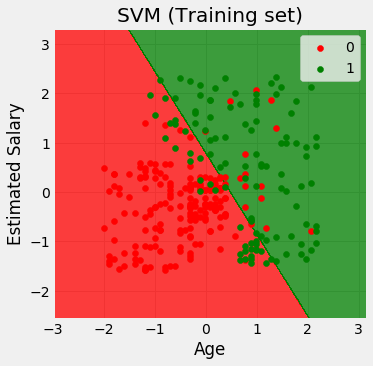

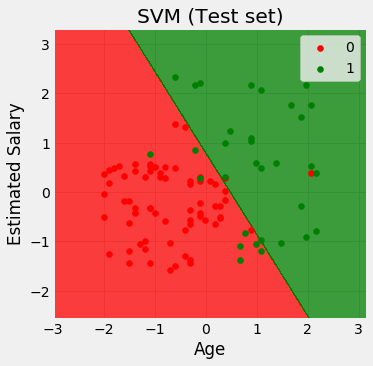

In [27]:
# Visulazing the results

X_set, y_set = X_train_scaled, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test_scaled, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()